In [15]:
import pandas as pd
df = pd.read_csv("AFP11.csv", header = None, index_col = 0)
df

,1,2,3,4,5,6,7,8,9,10,...,1732,1733,1734,1735,1736,1737,1738,1739,1740,1741
0,,,,,,,,,,,,,,,,,,,,,
113927,0,1.826,0.000,0.000,0.913,2.738,0.913,0.000,1.826,0.000,...,3.121,1.431,3.818,3.530,3.292,1.959,3.341,3.246,2.389,4.671
210960,0,2.400,1.200,1.200,0.000,1.200,1.200,1.200,1.200,1.200,...,2.971,3.955,4.287,4.049,3.225,3.373,4.477,5.191,4.125,5.024
213510,0,3.765,1.076,1.076,1.076,0.000,2.152,0.000,0.000,1.614,...,3.302,2.839,3.193,2.668,3.762,2.680,3.633,3.177,3.415,2.538
2315605,0,1.848,0.000,0.000,0.000,1.848,1.848,0.000,0.924,0.000,...,1.652,2.395,3.600,2.903,2.980,2.850,2.037,2.590,1.985,2.208
2411496,0,2.012,3.353,0.671,0.671,1.341,0.671,0.000,3.353,1.341,...,1.838,2.066,2.681,2.351,3.199,2.203,1.871,2.478,2.057,2.244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112799355,0,0.413,0.000,0.826,0.826,1.652,2.065,0.000,1.239,2.065,...,3.128,3.232,3.453,3.504,3.250,4.001,3.119,4.438,4.032,4.167
95929364,0,2.112,0.469,1.643,1.878,0.704,0.939,0.704,0.939,1.643,...,3.762,4.099,3.968,3.876,3.793,3.591,4.362,4.005,4.376,4.381
260400154,0,2.464,0.000,0.352,0.000,1.056,1.760,0.704,1.760,2.464,...,3.651,3.608,3.596,3.987,2.927,3.714,3.648,3.374,3.424,3.988


##Обучение модели по классификатору Антифриз- и Неантифриз-белков

##Импортировали Библиотеку Pandas, считали одну из частей датасета,относящуюся к антифриз-белкам,удалили пенрвую строку таблицы,так как она не несет названия колонок, а несет  информацию о данных,которую мы не можем интерпретировать,затем превратили ID-номера белков в индексы,которые можно считать.

In [18]:
df2 = pd.read_csv("Non-AFP11.csv", header = None, index_col = 0)
df2

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,1,2,3,4,5,6,7,8,9,10,...,1732,1733,1734,1735,1736,1737,1738,1739,1740,1741
0,,,,,,,,,,,,,,,,,,,,,
137265,0,0.624,1.559,0.624,1.559,0.936,0.936,0.624,1.559,0.936,...,3.682,4.092,3.940,4.147,4.006,3.427,3.443,3.755,3.468,3.826
122151,0,1.711,0.000,0.855,1.711,0.855,1.283,0.214,0.428,0.000,...,3.542,4.118,4.190,4.343,4.141,3.863,4.032,3.612,4.321,4.239
82000822,0,1.193,0.477,1.670,0.477,0.477,1.431,0.239,1.193,1.670,...,3.812,3.846,3.854,3.444,3.771,3.629,3.513,3.366,3.793,4.266
81861101,0,2.246,0.250,0.749,1.747,0.499,1.747,0.998,0.749,0.250,...,3.798,4.631,3.734,3.612,3.859,3.264,3.924,3.927,3.462,3.680
74749902,0,1.256,0.000,0.628,4.395,0.000,1.465,0.209,0.628,0.419,...,4.176,3.820,3.395,3.995,4.015,3.680,3.294,3.808,4.285,3.670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702203,0,1.282,2.051,0.513,1.282,0.513,0.769,0.000,1.025,3.845,...,3.668,3.693,2.788,3.199,3.598,3.501,4.212,3.639,3.834,3.920
54036623,0,1.599,0.267,0.800,0.800,0.533,1.866,0.533,1.066,0.800,...,3.251,2.893,3.528,3.633,2.889,3.591,3.259,3.720,4.007,3.098
6176596,0,1.345,0.769,0.577,3.075,0.961,1.345,0.577,1.153,1.538,...,4.198,3.945,3.590,3.844,3.822,3.613,3.734,3.561,3.978,3.489


#То же самое проделали с другой частью датасета,не относящуюся к анфриз-белкам.Она больше первой!

In [9]:
df.describe()
df2.describe()

,1,2,3,4,5,6,7,8,9,10,...,1732,1733,1734,1735,1736,1737,1738,1739,1740,1741
count,9191.0,9191.000000,9191.000000,9191.000000,9191.000000,9191.000000,9191.000000,9191.000000,9191.000000,9191.000000,...,9191.000000,9191.000000,9191.000000,9191.000000,9191.000000,9191.000000,9191.000000,9191.000000,9191.000000,9191.000000
mean,0.0,1.739465,0.322835,1.040977,1.265832,0.850221,1.278289,0.431777,1.219439,1.190505,...,3.979505,3.875254,3.903883,3.957806,3.935397,3.916200,3.942394,3.962005,3.920976,3.927703
std,0.0,1.188657,0.535963,0.696752,0.867032,0.690795,0.867162,0.471979,0.900928,0.896399,...,0.534274,0.538933,0.525287,0.547854,0.566572,0.583029,0.603313,0.644023,0.686593,0.752340
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.983000,0.639000,0.416000,0.518000,0.671000,0.204000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.959500,0.000000,0.599000,0.699000,0.408000,0.712000,0.000000,0.651000,0.558000,...,3.673500,3.576000,3.610500,3.654000,3.633000,3.607000,3.631000,3.652000,3.609000,3.617500
50%,0.0,1.526000,0.160000,1.006000,1.187000,0.752000,1.175000,0.352000,1.064000,1.070000,...,3.971000,3.871000,3.913000,3.949000,3.935000,3.911000,3.937000,3.949000,3.919000,3.935000
75%,0.0,2.277500,0.452000,1.412000,1.706000,1.158500,1.710000,0.648000,1.618000,1.660500,...,4.277000,4.173000,4.196000,4.243000,4.236000,4.217000,4.244000,4.253000,4.231000,4.238000
max,0.0,10.650000,10.753000,6.940000,12.698000,7.849000,10.753000,11.600000,13.991000,11.734000,...,7.189000,7.470000,6.895000,7.903000,8.066000,10.754000,10.309000,13.741000,14.145000,13.860000


##Сделали статистическое описание датасета

In [10]:
df.loc[:, (df == 0).all()]

,1
0,
137265,0
122151,0
82000822,0
81861101,0
74749902,0
...,...
51702203,0
54036623,0
6176596,0


##Выяснили,сколько столбцов содежат тождественное значение ноль

In [19]:
df2 = df2.drop(columns = [1])
df = df.drop(columns = [1])

##Удалили их

In [20]:
df2

,2,3,4,5,6,7,8,9,10,11,...,1732,1733,1734,1735,1736,1737,1738,1739,1740,1741
0,,,,,,,,,,,,,,,,,,,,,
137265,0.624,1.559,0.624,1.559,0.936,0.936,0.624,1.559,0.936,2.495,...,3.682,4.092,3.940,4.147,4.006,3.427,3.443,3.755,3.468,3.826
122151,1.711,0.000,0.855,1.711,0.855,1.283,0.214,0.428,0.000,1.711,...,3.542,4.118,4.190,4.343,4.141,3.863,4.032,3.612,4.321,4.239
82000822,1.193,0.477,1.670,0.477,0.477,1.431,0.239,1.193,1.670,3.579,...,3.812,3.846,3.854,3.444,3.771,3.629,3.513,3.366,3.793,4.266
81861101,2.246,0.250,0.749,1.747,0.499,1.747,0.998,0.749,0.250,2.746,...,3.798,4.631,3.734,3.612,3.859,3.264,3.924,3.927,3.462,3.680
74749902,1.256,0.000,0.628,4.395,0.000,1.465,0.209,0.628,0.419,1.884,...,4.176,3.820,3.395,3.995,4.015,3.680,3.294,3.808,4.285,3.670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702203,1.282,2.051,0.513,1.282,0.513,0.769,0.000,1.025,3.845,1.538,...,3.668,3.693,2.788,3.199,3.598,3.501,4.212,3.639,3.834,3.920
54036623,1.599,0.267,0.800,0.800,0.533,1.866,0.533,1.066,0.800,2.666,...,3.251,2.893,3.528,3.633,2.889,3.591,3.259,3.720,4.007,3.098
6176596,1.345,0.769,0.577,3.075,0.961,1.345,0.577,1.153,1.538,1.345,...,4.198,3.945,3.590,3.844,3.822,3.613,3.734,3.561,3.978,3.489


In [21]:
df

,2,3,4,5,6,7,8,9,10,11,...,1732,1733,1734,1735,1736,1737,1738,1739,1740,1741
0,,,,,,,,,,,,,,,,,,,,,
113927,1.826,0.000,0.000,0.913,2.738,0.913,0.000,1.826,0.000,4.564,...,3.121,1.431,3.818,3.530,3.292,1.959,3.341,3.246,2.389,4.671
210960,2.400,1.200,1.200,0.000,1.200,1.200,1.200,1.200,1.200,5.999,...,2.971,3.955,4.287,4.049,3.225,3.373,4.477,5.191,4.125,5.024
213510,3.765,1.076,1.076,1.076,0.000,2.152,0.000,0.000,1.614,2.689,...,3.302,2.839,3.193,2.668,3.762,2.680,3.633,3.177,3.415,2.538
2315605,1.848,0.000,0.000,0.000,1.848,1.848,0.000,0.924,0.000,3.696,...,1.652,2.395,3.600,2.903,2.980,2.850,2.037,2.590,1.985,2.208
2411496,2.012,3.353,0.671,0.671,1.341,0.671,0.000,3.353,1.341,1.341,...,1.838,2.066,2.681,2.351,3.199,2.203,1.871,2.478,2.057,2.244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112799355,0.413,0.000,0.826,0.826,1.652,2.065,0.000,1.239,2.065,1.239,...,3.128,3.232,3.453,3.504,3.250,4.001,3.119,4.438,4.032,4.167
95929364,2.112,0.469,1.643,1.878,0.704,0.939,0.704,0.939,1.643,1.643,...,3.762,4.099,3.968,3.876,3.793,3.591,4.362,4.005,4.376,4.381
260400154,2.464,0.000,0.352,0.000,1.056,1.760,0.704,1.760,2.464,2.112,...,3.651,3.608,3.596,3.987,2.927,3.714,3.648,3.374,3.424,3.988


##Вывели обе части датасета в новом виде

In [24]:
df["AFP"] = 1
df2["AFP"] = 0

##Присвоили обеим частям датасета значения 1 и 0 соответственно

In [25]:
df_Xy = df.append(df2)

In [26]:
df_Xy

,2,3,4,5,6,7,8,9,10,11,...,1733,1734,1735,1736,1737,1738,1739,1740,1741,AFP
0,,,,,,,,,,,,,,,,,,,,,
113927,1.826,0.000,0.000,0.913,2.738,0.913,0.000,1.826,0.000,4.564,...,1.431,3.818,3.530,3.292,1.959,3.341,3.246,2.389,4.671,1
210960,2.400,1.200,1.200,0.000,1.200,1.200,1.200,1.200,1.200,5.999,...,3.955,4.287,4.049,3.225,3.373,4.477,5.191,4.125,5.024,1
213510,3.765,1.076,1.076,1.076,0.000,2.152,0.000,0.000,1.614,2.689,...,2.839,3.193,2.668,3.762,2.680,3.633,3.177,3.415,2.538,1
2315605,1.848,0.000,0.000,0.000,1.848,1.848,0.000,0.924,0.000,3.696,...,2.395,3.600,2.903,2.980,2.850,2.037,2.590,1.985,2.208,1
2411496,2.012,3.353,0.671,0.671,1.341,0.671,0.000,3.353,1.341,1.341,...,2.066,2.681,2.351,3.199,2.203,1.871,2.478,2.057,2.244,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702203,1.282,2.051,0.513,1.282,0.513,0.769,0.000,1.025,3.845,1.538,...,3.693,2.788,3.199,3.598,3.501,4.212,3.639,3.834,3.920,0
54036623,1.599,0.267,0.800,0.800,0.533,1.866,0.533,1.066,0.800,2.666,...,2.893,3.528,3.633,2.889,3.591,3.259,3.720,4.007,3.098,0
6176596,1.345,0.769,0.577,3.075,0.961,1.345,0.577,1.153,1.538,1.345,...,3.945,3.590,3.844,3.822,3.613,3.734,3.561,3.978,3.489,0


##Объединили обе части датасета в одну

In [27]:
X = df_Xy = df.append(df2)
X = df_Xy.drop(columns = ["AFP"])
y = df_Xy["AFP"]
                    

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


##Разбили на тренировочную и тестовую части

In [29]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))


Accuracy of Logistic regression classifier on training set: 0.98
Accuracy of Logistic regression classifier on test set: 0.97


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


##Построение модели логисттической регрессии.Вывод точности узнавания белков в классификаторе для тренировачночной и тестовой выборки

In [45]:
y_pred = logreg.predict(X_test)

In [46]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[2255,   40],
       [  52,   71]])

##Импортировали метрику

In [44]:
weights = {0:1.0, 1:10.0}
#model = LogisticRegression(class_weight=weights)
#logred = LogisticRegression()
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty = "l2",C = 0.01,class_weight = weights)
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
.format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
.format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.97
Accuracy of Logistic regression classifier on test set: 0.96


##Стартовая модель работает плохо,так как датасет про неантифриз-белки больше, и модель ошибочно выводит нули. Улучшаем модель путем перераспределения классов. Теперь она узнает 71 белок и при этом делает 40 ошибок.

In [50]:
from sklearn.metrics import roc_curve
y_pred_rf = logreg.predict_proba(X_test)[:, 1] 
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

In [48]:
import matplotlib.pyplot as plt

No handles with labels found to put in legend.


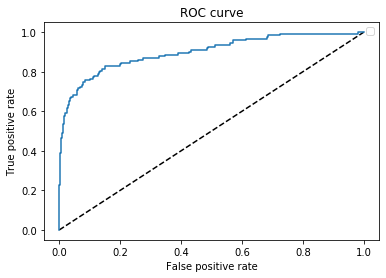

In [51]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

##Построили Рок-кривую для визуализации работы модели. Чем более выпруклая кривая,тем более точно работает модель.Вывод - наша модель работает неплохо.